<a href="https://colab.research.google.com/github/NidhiS9830/woc5.0-ml-weather-prediction-case-study-Nidhi_Somaiya/blob/main/WOC_ML_Checkpoint_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WEATHER PREDICTION**

**INSTALLING  IMPORTING REQUIRED LIBRARIES**

In [70]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
import plotly.express as px


<b>IMPORTING DATASET

In [72]:
weather_df = pd.read_csv('/content/weather.csv')

In [73]:
weather_df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


**DATA PREPROCESSING**

In [74]:
weather_df.isnull().sum()   # checking the null values

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

Inference- No null values

In [75]:
weather_df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [76]:
weather_df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


Changing the categorical variable to numerical variable

**DATA VISUALIZATION**

Data visualization for weather

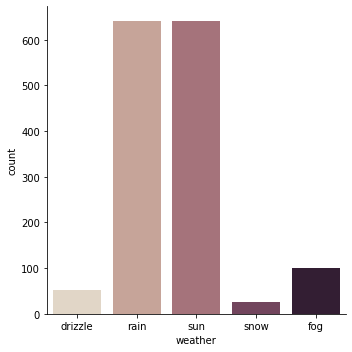

In [77]:
sb.catplot(data=weather_df, x="weather", kind="count", palette="ch:.25")

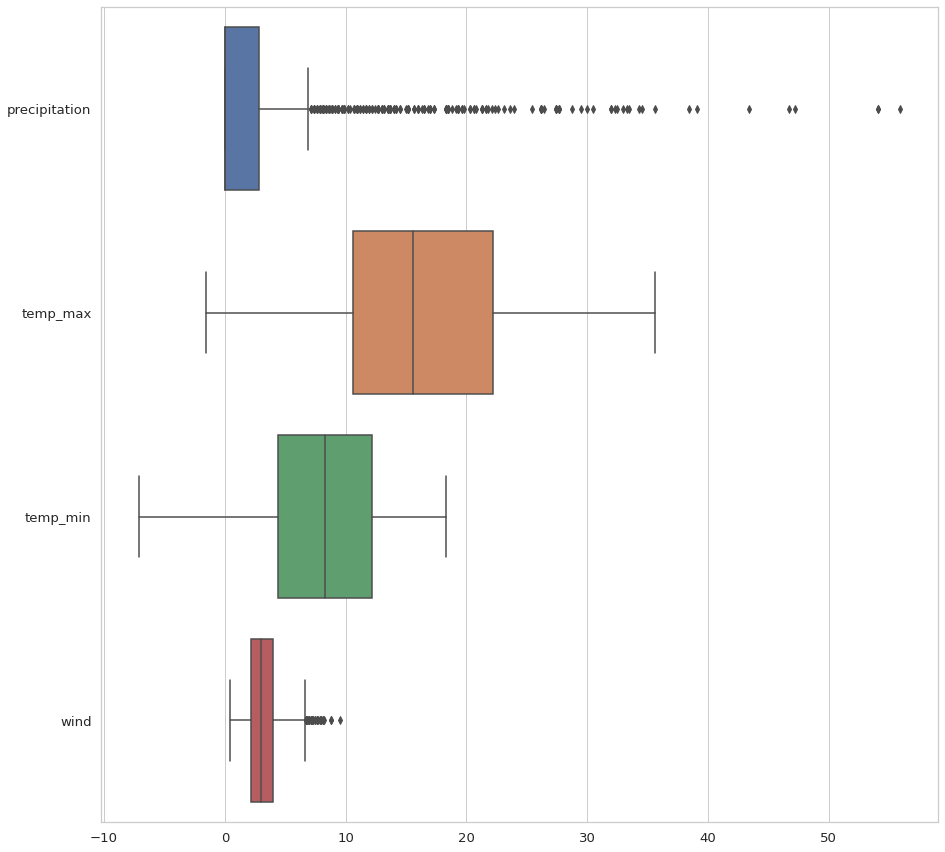

In [101]:
sb.set(rc={'figure.figsize':(15,15)}, font_scale=1.2, style='whitegrid')
boxplts = weather_df.drop("weather", axis=1)
sb.boxplot(data=boxplts, orient="h")

Finding the correlation between all the features

In [79]:
corr = weather_df.corr()  

In [80]:
print(corr)

               precipitation  temp_max  temp_min      wind   weather
precipitation       1.000000 -0.228555 -0.072684  0.328045 -0.267388
temp_max           -0.228555  1.000000  0.875687 -0.164857  0.322337
temp_min           -0.072684  0.875687  1.000000 -0.074185  0.154981
wind                0.328045 -0.164857 -0.074185  1.000000 -0.065858
weather            -0.267388  0.322337  0.154981 -0.065858  1.000000


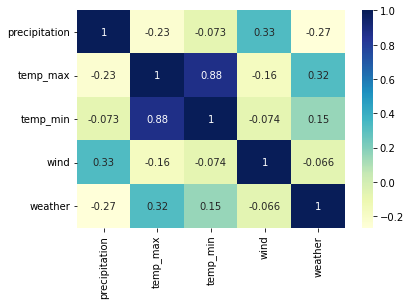

In [81]:
dataplot = sb.heatmap(weather_df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

**LOGISTIC REGRESSION**

changing the categorical variable to numerical variable

In [78]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
weather_df['weather']= label_encoder.fit_transform(weather_df['weather'])
  
weather_df['weather'].unique()


array([0, 2, 4, 3, 1])

Importing logistic regression model

In [82]:
from sklearn.linear_model import LogisticRegression

Testing and training the model

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X = weather_df.drop('weather',axis=1)  #dropping the target feature 

In [85]:
X.head()

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1


In [86]:
y = weather_df['weather']  # target feature 

In [87]:
y.head()

0    0
1    2
2    2
3    2
4    2
Name: weather, dtype: int64

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
#splitting the data into training and testing data 
# 80% - training data
# 20% - testing data 

In [89]:
X_train.head()

,precipitation,temp_max,temp_min,wind
290,0.0,14.4,6.1,1.6
24,8.1,8.9,4.4,5.4
1093,0.0,6.1,0.6,4.3
1288,0.0,26.1,16.7,2.2
374,38.4,10.0,1.7,5.1


In [90]:
y_train.head()

290     4
24      2
1093    1
1288    4
374     2
Name: weather, dtype: int64

In [91]:
X_test.head()

,precipitation,temp_max,temp_min,wind
1437,54.1,15.6,10.0,6.2
57,0.0,6.7,-2.2,3.0
780,1.0,8.3,3.9,6.0
382,0.0,3.9,-2.8,1.0
1170,1.0,13.9,6.1,3.0


In [92]:
y_test.head()

1437    2
57      4
780     2
382     0
1170    2
Name: weather, dtype: int64

In [93]:
model = LogisticRegression() # initializing the logistic regression model 

In [94]:
model.fit(X_train,y_train) #Model fitting

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [95]:
print(model.predict(X_test))

[2 4 2 4 2 2 4 4 4 2 4 4 4 4 2 2 2 2 4 4 4 4 4 2 2 2 4 2 4 4 2 4 2 4 2 4 4
 4 2 2 2 4 4 2 2 4 2 4 4 2 2 4 4 2 4 2 2 2 4 2 2 4 2 2 2 4 4 4 4 4 2 4 2 4
 2 2 4 4 2 2 2 2 4 4 2 4 2 4 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 4 2 4 4 2 2 4 2
 2 4 2 2 4 4 4 4 4 4 4 2 2 4 4 4 4 4 4 4 2 2 2 2 4 4 4 4 4 2 4 4 2 2 2 4 2
 2 2 4 4 4 4 2 4 4 4 4 4 2 2 2 4 2 4 4 4 4 2 2 4 2 2 2 2 4 2 4 2 4 4 2 2 2
 4 2 4 2 4 4 3 4 2 2 4 2 2 2 4 2 2 2 2 4 4 2 2 4 2 4 2 4 4 2 4 4 4 4 4 4 2
 4 4 2 4 4 4 4 2 2 4 4 4 4 4 4 2 4 4 2 4 2 4 4 4 4 4 2 4 4 4 4 2 4 2 4 2 4
 4 2 2 2 4 4 4 4 2 2 2 4 4 2 4 2 4 4 2 4 2 4 4 4 2 4 4 2 4 2 4 4 4 4]


**TESTING THE ACCURACY**

In [96]:
result = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 86.69%


The model gives 86.69% accuracy